# Analysis of concatenated DEJMPS

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Interactive plot

In [3]:
%matplotlib inline

In [4]:
imp.reload(main)

n = 8

policy_names = ['Replacement']+['Concat. DEJMPS x'+str(i) for i in range(1,n+1)]+['Optimal bi. Cliff.']
policy_names += ['513 EC', '513 ED']

main.AFplot_interactive(policy_names)

interactive(children=(IntSlider(value=1, description='n', layout=Layout(width='60%'), max=15, min=1), FloatSli…

---
---
## Paper plot

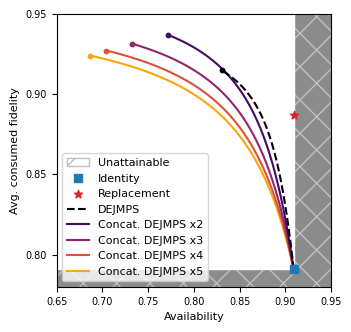

In [8]:
n = 10

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = np.linspace(0,1,50)
policy_names = ['DEJMPS']+['Concat. DEJMPS x'+str(i) for i in [2,3,4,5]]
pur_after_swap = False

# NOISE
Gamma = 1/50

# CONS
p_cons = 0.1

# VARYING PARAMETER
varying_param = 'q_purif'

## RUN ##
imp.reload(main)
main.AFplot_vs_id_vs_repl(varying_param, n, p_gen, rho_new, q_purif, policy_names,
                          pur_after_swap, Gamma, p_cons, ylims=[0.78,0.95], savefig=True)